In [1]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
print(os.listdir("./"))

['.ipynb_checkpoints', 'FDA-practice-Decision-Tree', 'FDA_practice', 'hw1.ipynb', 'Reviews.csv']


In [11]:
#第一小題
data_path = "./Reviews.csv"
pd_data = pd.read_csv(data_path,encoding='big5') #若有更動CSV檔案 可能導致CSV編碼跟讀入的encoding編碼不一 故加入big5指令
pd_data = pd_data[:10000]
#type(pd_data)
#pd_data.shape
profilename=pd_data["ProfileName"]
score=pd_data["Score"]
userid=pd_data["UserId"]
HNV=pd_data["HelpfulnessNumerator"]
HDV=pd_data["HelpfulnessDenominator"]

a=zip(userid,profilename)
A=dict(a)
result = pd.value_counts(userid)
ID= np.array(result[:16].keys())


print('%-15s'%'UserId','%-42s'%'Profilename','%-12s'%'Score count','Score mean')
for k in range(0,16):
    ssum = 0
    count = 0
    
    for i in range(0,10000):
        if (userid[i] == result[k:k+1].keys()):
            ssum = ssum+score[i]
            count = count+1
            r = i
    ave = ssum / count
    print('%-15s' %userid[r],'%-44s' %A[userid[r]],'%-12d'%count,'%-14f'%ave)



UserId          Profilename                                Score count  Score mean
A1Z54EM24Y40LL  c2                                           17           3.882353      
A2SZLNSI5KOQJT  Carrie, "Formerly &#34;Sister Carrie&#34;"   10           3.800000      
A35R32TA60XD57  M. Torma                                     9            4.111111      
A281NPSIMI1C2R  Rebecca of Amazon "The Rebecca Review"       8            5.000000      
A3OXHLG6DIBRW8  C. F. Hill "CFH"                             7            4.428571      
A3NHUQ33CFH3VM  Citizen John                                 7            3.142857      
A3PJZ8TU8FDQ1K  Jared Castle                                 7            4.714286      
AY12DBB0U420B   Gary Peterson                                6            4.500000      
AP03SDCDB6RBD   E. OConnor "erdoreen"                        6            4.333333      
A26NFIQ7KWI8Y7  kt rose                                      6            2.666667      
AQ6SHOW0VMZGF   K. Padgett 

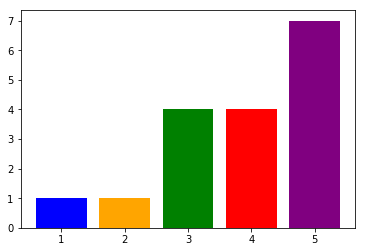

In [12]:
#第二小題
a1=0
a2=0
a3=0
a4=0
a5=0
x_count=['1','2','3','4','5']
for i in range(0,10000):
    if (userid[i] == result[0:1].keys()):
        d = i
        if (score[d] == 5):
            a5 = a5+1
        elif(score[d] == 4):
            a4 = a4+1
        elif(score[d] == 3):
            a3 = a3+1
        elif(score[d] == 2):
            a2 = a2+1
        elif(score[d] == 1):
            a1 = a1+1
count_set=[a1,a2,a3,a4,a5]
#plt.bar(x_count,count_set)
plt.bar('1',a1,color='blue')
plt.bar('2',a2,color='orange')
plt.bar('3',a3,color='green')
plt.bar('4',a4,color='red')
plt.bar('5',a5,color='purple')
plt.show()

<BarContainer object of 10 artists>

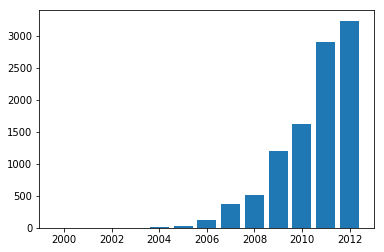

In [13]:
#第三小題
import time

time = pd_data["Time"]
Newdate=np.array([])

for j in range(0,10000):
    t=1970+int(time[j]/31556926)
    Newdate=np.append(Newdate,t)

ND=pd.Series(Newdate)
NDResult=pd.value_counts(ND)

plt.bar(NDResult.keys(),NDResult.values)


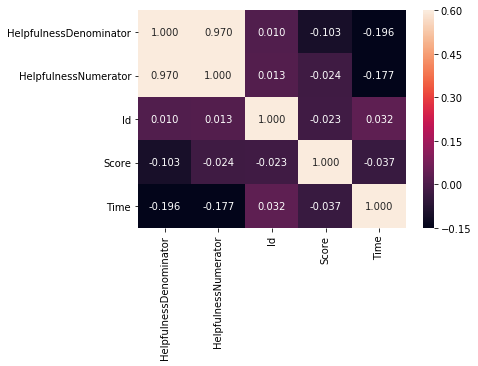

In [14]:
#第四小題
IID=pd_data["Id"]

df = pd.DataFrame({'Score':score,'HelpfulnessNumerator':HNV,'Time':ND,'HelpfulnessDenominator':HDV,'Id':IID})
df.corr()

sns.heatmap(df.corr(),  vmin=-0.15, vmax=0.6,annot=True, fmt=".3f")   

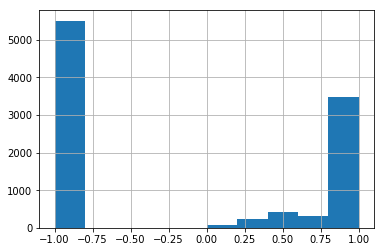

In [15]:
#第五小題
helppercent=np.array([])

for l in range(0,10000):
    if (HNV[l] == 0 & HDV[l] == 0):
        helppercent = np.append(helppercent,-1)
    elif (HNV[l] > HDV[l]):
        continue;
    else:
        helppercent = np.append(helppercent,(HNV[l]/HDV[l]))
        
plt.hist(helppercent)
plt.grid()
plt.show()